In [1]:
# Import dependencies

import pandas as pd

import matplotlib.pyplot as plt

import numpy as np

In [2]:
# Create a set of random lats and longs combo

lats = np.random.uniform(-90.000,90.000,size=1500)

longs = np.random.uniform(-180.000,180.000, size=1500)

lat_longs = zip(lats, longs)

lat_longs

In [3]:
coordinates = list(lat_longs)

In [4]:
from citipy import citipy

In [5]:
# import requests library

import requests

# import API key

from config import weather_api_key

url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [6]:
# create a list for holding cities

cities = []

# identify nearest city for each lat and long combo

for coordinate in coordinates:
    
    city = citipy.nearest_city(coordinate[0],coordinate[1]).city_name
    
#     if the city is unique, add to cities list
    if city not in cities:
        cities.append(city)
        
# print len cities

len(cities)

603

In [7]:
import requests

requests.__version__

'2.26.0'

In [8]:
# import time library

import time 

from datetime import datetime

In [9]:
# create empty list for weather data

city_data = []

# print beginning of the logging

print('Beginning Data Retrieval    ')

print('----------------------------')


# create counters

record_count = 1

set_count = 1

# Loop through all the cities in the list

for i, city in enumerate(cities):
    
    
#     Group cities in sets of 50 for logging purposes

    if (i % 50 == 0 and i >= 50):
        
        set_count += 1
        
        record_count = 1
        
        time.sleep(60)
        
#         Create endpoint url
    city_url = url + '&q=' + city.replace(" ","+")
    
#     log the url
    print(f'Processing Record {record_count} of Set {set_count} | {city}')
    
#     add 1 to the record count

    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval    
----------------------------
Processing Record 1 of Set 1 | rikitea
Processing Record 2 of Set 1 | provideniya
Processing Record 3 of Set 1 | beni suef
Processing Record 4 of Set 1 | cidreira
Processing Record 5 of Set 1 | vaini
Processing Record 6 of Set 1 | carnarvon
Processing Record 7 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 8 of Set 1 | port lincoln
Processing Record 9 of Set 1 | belushya guba
City not found. Skipping...
Processing Record 10 of Set 1 | hilo
Processing Record 11 of Set 1 | havelock
Processing Record 12 of Set 1 | port macquarie
Processing Record 13 of Set 1 | busselton
Processing Record 14 of Set 1 | dikson
Processing Record 15 of Set 1 | barrow
Processing Record 16 of Set 1 | castro
Processing Record 17 of Set 1 | puerto ayora
Processing Record 18 of Set 1 | nemuro
Processing Record 19 of Set 1 | hithadhoo
Processing Record 20 of Set 1 | albany
Processing Record 21 of Set 1 | hermanus
Processing Record 

Processing Record 34 of Set 4 | trairi
Processing Record 35 of Set 4 | vila
Processing Record 36 of Set 4 | faya
Processing Record 37 of Set 4 | endicott
Processing Record 38 of Set 4 | panaba
Processing Record 39 of Set 4 | liverpool
Processing Record 40 of Set 4 | winneba
Processing Record 41 of Set 4 | ust-nera
Processing Record 42 of Set 4 | gimbi
Processing Record 43 of Set 4 | flinders
Processing Record 44 of Set 4 | pevek
Processing Record 45 of Set 4 | chaa-khol
City not found. Skipping...
Processing Record 46 of Set 4 | kavaratti
Processing Record 47 of Set 4 | tuggurt
City not found. Skipping...
Processing Record 48 of Set 4 | pfullendorf
Processing Record 49 of Set 4 | taungdwingyi
Processing Record 50 of Set 4 | taolanaro
City not found. Skipping...


KeyboardInterrupt: 

In [10]:
# Convert the array of dicts to a pd DF

city_data_df = pd.DataFrame(city_data)

city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Rikitea,-23.1203,-134.9692,76.69,70,41,11.03,PF,2022-05-10 01:28:35
1,Provideniya,64.3833,-173.3000,35.13,62,1,7.20,RU,2022-05-10 01:28:35
2,Beni Suef,29.0731,31.0979,67.33,50,0,5.91,EG,2022-05-10 01:28:36
3,Cidreira,-30.1811,-50.2056,67.14,85,5,14.88,BR,2022-05-10 01:28:36
4,Vaini,-21.2000,-175.2000,77.16,61,20,8.05,TO,2022-05-10 01:28:37
5,Carnarvon,-24.8667,113.6333,77.07,44,100,5.75,AU,2022-05-10 01:28:37
6,Port Lincoln,-34.7333,135.8667,63.32,56,0,8.14,AU,2022-05-10 01:28:38
7,Hilo,19.7297,-155.0900,82.13,62,0,8.05,US,2022-05-10 01:28:39
8,Havelock,34.8791,-76.9013,60.80,51,40,16.11,US,2022-05-10 01:28:39
9,Port Macquarie,-31.4333,152.9167,69.89,62,29,4.25,AU,2022-05-10 01:28:40


In [11]:
new_column_order = ['City', 'Country','Date', 'Lat','Lng','Max Temp','Humidity','Cloudiness', 'Wind Speed']

city_data_df = city_data_df[new_column_order]

In [12]:
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Rikitea,PF,2022-05-10 01:28:35,-23.1203,-134.9692,76.69,70,41,11.03
1,Provideniya,RU,2022-05-10 01:28:35,64.3833,-173.3000,35.13,62,1,7.20
2,Beni Suef,EG,2022-05-10 01:28:36,29.0731,31.0979,67.33,50,0,5.91
3,Cidreira,BR,2022-05-10 01:28:36,-30.1811,-50.2056,67.14,85,5,14.88
4,Vaini,TO,2022-05-10 01:28:37,-21.2000,-175.2000,77.16,61,20,8.05
...,...,...,...,...,...,...,...,...,...
170,Flinders,AU,2022-05-10 01:32:36,-34.5833,150.8552,68.18,88,97,4.00
171,Pevek,RU,2022-05-10 01:33:07,69.7008,170.3133,33.46,75,100,13.94
172,Kavaratti,IN,2022-05-10 01:33:08,10.5669,72.6420,85.33,73,100,19.89
173,Pfullendorf,DE,2022-05-10 01:32:15,47.9167,9.2500,48.92,95,0,2.19


In [13]:
# create output file csv

output_data_file = 'weather_data/cities.csv'

# export the city_data into a csv

city_data_df.to_csv(output_data_file, index_label = 'City ID')

In [14]:
# Extract relevant fields from the DF for plotting

lats = city_data_df['Lat']

max_temps = city_data_df['Max Temp']

humidity = city_data_df['Humidity']

cloudiness = city_data_df['Cloudiness']

wind_speed = city_data_df['Wind Speed']

In [15]:
# todays date

today = time.strftime('%x')

today

'05/09/22'

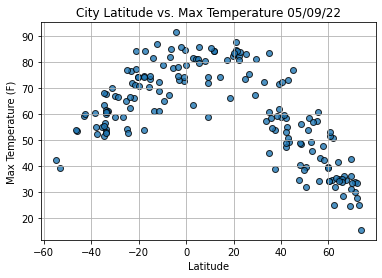

In [16]:
# scatter plot for lat vs max temp

plt.scatter(lats, max_temps, edgecolor='k', linewidths=1, marker='o', alpha =0.8, label = 'Cities')

# incorp other graph properties

plt.title(f'City Latitude vs. Max Temperature ' + time.strftime('%x'))

plt.ylabel('Max Temperature (F)')

plt.xlabel('Latitude')

plt.grid(True)

# save fig

plt.savefig('weather_data/Fig2.png')

# show plot

plt.show()

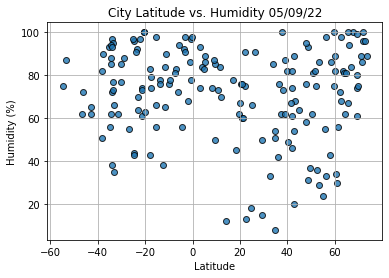

In [18]:
# scatter plot for lat vs humidity

plt.scatter(lats, humidity, edgecolor='k', linewidths=1, marker='o', alpha =0.8, label = 'Cities')

# incorp other graph properties

plt.title(f'City Latitude vs. Humidity ' + time.strftime('%x'))

plt.ylabel('Humidity (%)')

plt.xlabel('Latitude')

plt.grid(True)

# save fig

plt.savefig('weather_data/Fig3.png')

# show plot

plt.show()

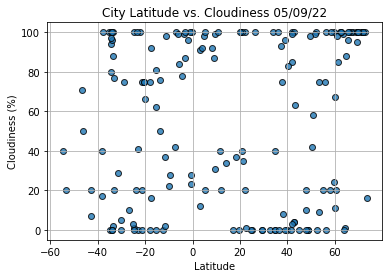

In [19]:
# scatter plot for lat vs cloudiness

plt.scatter(lats, cloudiness, edgecolor='k', linewidths=1, marker='o', alpha =0.8, label = 'Cities')

# incorp other graph properties

plt.title(f'City Latitude vs. Cloudiness ' + time.strftime('%x'))

plt.ylabel('Cloudiness (%)')

plt.xlabel('Latitude')

plt.grid(True)

# save fig

plt.savefig('weather_data/Fig4.png')

# show plot

plt.show()

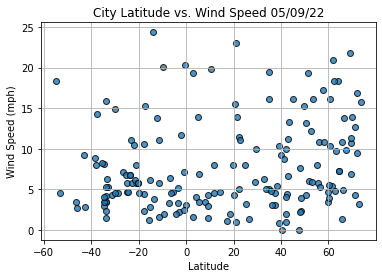

In [21]:
# scatter plot for lat vs wind speed

plt.scatter(lats, wind_speed, edgecolor='k', linewidths=1, marker='o', alpha =0.8, label = 'Cities')

# incorp other graph properties

plt.title(f'City Latitude vs. Wind Speed ' + time.strftime('%x'))

plt.ylabel('Wind Speed (mph)')

plt.xlabel('Latitude')

plt.grid(True)

# save fig

plt.savefig('weather_data/Fig5.png')

# show plot

plt.show()

In [22]:
# import linear regression from the SciPy mod

from scipy.stats import linregress


# create function to perform linear regression on weather data

def plot_linear_regression(x_values,y_values,title,y_label,text_coordinates):
    
#     run regression on hemisphere weather data
    (slope,intercept,r_value,p_value,std_err) = linregress(x_values, y_values)
    
    
#     calc the regression line 'y value' from slope and intercept
    
    regress_values = x_values * slope + intercept
    
#     get equation on line
    
    line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
    
#     create scatter plot
    
    plt.scatter(x_values,y_values)
    
    plt.plot(x_values, regress_values, "r")
    
#     annotate the text for the line equation
    
    plt.annotate(line_eq, text_coordinates, fontsize=15, color='red')
    
    plt.title(title)
    
    plt.xlabel('Latitude')
    
    plt.ylabel(y_label)
    
    plt.show()
    


In [24]:
index13 = city_data_df.loc[13]
index13

City                       Castro
Country                        BR
Date          2022-05-10 01:28:42
Lat                      -24.7911
Lng                      -50.0119
Max Temp                    54.28
Humidity                       96
Cloudiness                      1
Wind Speed                    4.7
Name: 13, dtype: object

In [29]:
# create northern and southern hemisphere DF

northern_hemi_df = city_data_df.loc[(city_data_df['Lat'] >= 0)]

southern_hemi_df = city_data_df.loc[(city_data_df['Lat'] < 0)]

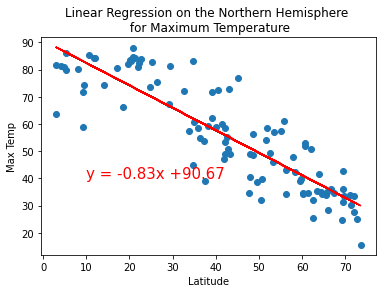

In [35]:
# linear regression on north

x_values = northern_hemi_df['Lat']

y_values = northern_hemi_df['Max Temp']

# call function

plot_linear_regression(x_values, y_values, 'Linear Regression on the Northern Hemisphere \n for Maximum Temperature', 'Max Temp', (10,40))

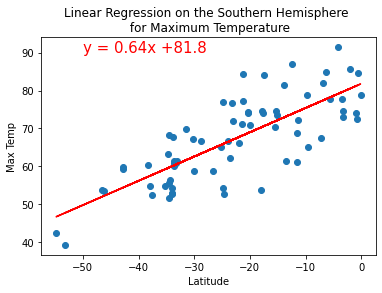

In [34]:
x_values = southern_hemi_df['Lat']

y_values = southern_hemi_df['Max Temp']

# call function

plot_linear_regression(x_values, y_values, 'Linear Regression on the Southern Hemisphere \n for Maximum Temperature', 'Max Temp', (-50,90))

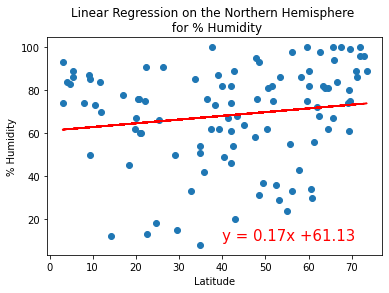

In [46]:
x_values = northern_hemi_df['Lat']

y_values = northern_hemi_df['Humidity']

# call function

plot_linear_regression(x_values, y_values, 'Linear Regression on the Northern Hemisphere \n for % Humidity', '% Humidity', (40,10))

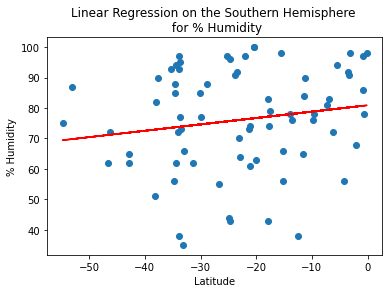

In [38]:
x_values = southern_hemi_df['Lat']

y_values = southern_hemi_df['Humidity']

# call function

plot_linear_regression(x_values, y_values, 'Linear Regression on the Southern Hemisphere \n for % Humidity', '% Humidity', (-50, 15))

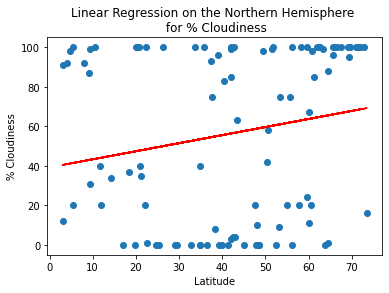

In [51]:
x_values = northern_hemi_df['Lat']

y_values = northern_hemi_df['Cloudiness']

# call function

plot_linear_regression(x_values, y_values, 'Linear Regression on the Northern Hemisphere \n for % Cloudiness', '% Cloudiness', (-50,80))

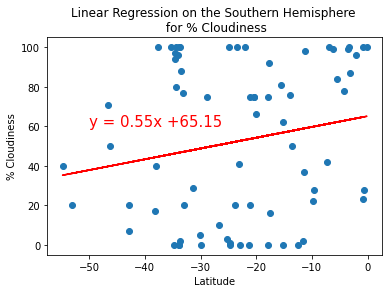

In [47]:
x_values = southern_hemi_df['Lat']

y_values = southern_hemi_df['Cloudiness']

# call function

plot_linear_regression(x_values, y_values, 'Linear Regression on the Southern Hemisphere \n for % Cloudiness', '% Cloudiness', (-50,60))

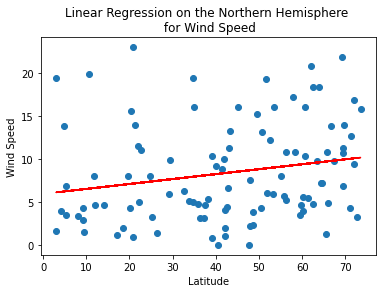

In [57]:
# Linear regression on the Northern Hemisphere

x_values = northern_hemi_df["Lat"]

y_values = northern_hemi_df["Wind Speed"]

# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Northern Hemisphere \n for Wind Speed', 'Wind Speed',(40,35))

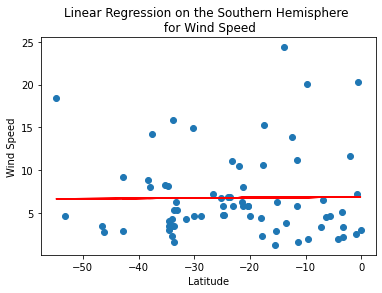

In [58]:
# Linear regression on the Southern Hemisphere

x_values = southern_hemi_df["Lat"]

y_values = southern_hemi_df["Wind Speed"]

# Call the function.

plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Wind Speed', 'Wind Speed',(-50,35))